**Data Science and Business analytics-The Sparks Foundation**


**Task1-Prediction using Supervised ML -To predict the percentage of students based on the number of hours they studied.**

**Prajwal Sharma**

In [1]:
#importing the libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# importing the dataset via link
link = "http://bit.ly/w-data"
data = pd.read_csv(link)
print("*****Data set imported*****")
#working on the first 10 rows by using head(10)
data.head(10)

*****Data set imported*****


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Plotting the given data on a graph to fing any visual relationship between the hours studied and the marks obtained.

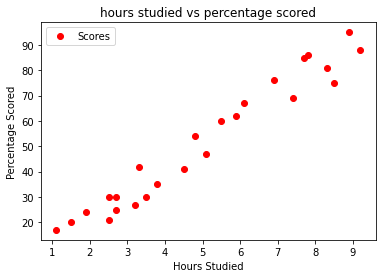

In [3]:
# Plotting the graph
data.plot('Hours','Scores', style='ro')  
plt.title('hours studied vs percentage scored')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Scored')  
plt.show()

It is evident from the graph that there is linear realtionship between the number of hours studied to the percentage obtained.

### **Preparing the data**

The next step is to divide the data into input("number of hours studied") and outputs("percentage obtained")

In [4]:
X = data.iloc[:, :-1].values  
print(X)
y = data.iloc[:, 1].values 
print(y) 

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


Now we have our inputs and outputs so we need to use supervised machine learning algorithm to split the dataset into training and test data in order to precisely map our inputs to outputs. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [5]:
 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.25, random_state=0) 
print(X_train)
print("*********")
print(X_test)
print("*********")
print(y_train)
print("*********")
print( y_test)

[[7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]]
*********
[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]
*********
[86 76 17 47 85 42 81 88 67 30 25 60 30 75 21 54 95 41]
*********
[20 27 69 30 62 35 24]


### **Training the Algorithm**

In [6]:
model = LinearRegression().fit(X_train, y_train) 
print(model.intercept_)
print(model.coef_)

print("******Training complete*******")

1.9322042531516601
[9.94167834]
******Training complete*******


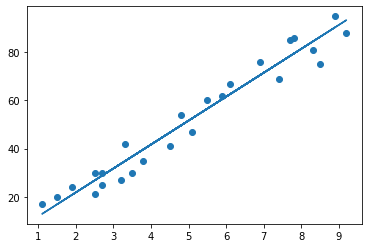

In [7]:
# Plotting the regression line
line = model.coef_*X+model.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### **Making Predictions**
making predictions on the trained algorithm


In [8]:
print(X_test) 
y_pred = model.predict(X_test) # Predicting the scores
print("The predicted score:", y_pred)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]
The predicted score: [16.84472176 33.74557494 75.50062397 26.7864001  60.58810646 39.71058194
 20.8213931 ]


In [9]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


In [10]:
# testing with own data
hours = [[6.0]]
own_pred =model.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[6.0]]
Predicted Score = 61.58227429008023


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [11]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.130879918502482
